In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score
from sklearn.preprocessing import StandardScaler

from pathlib import Path

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
del df['CustomerID']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [5]:
df.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

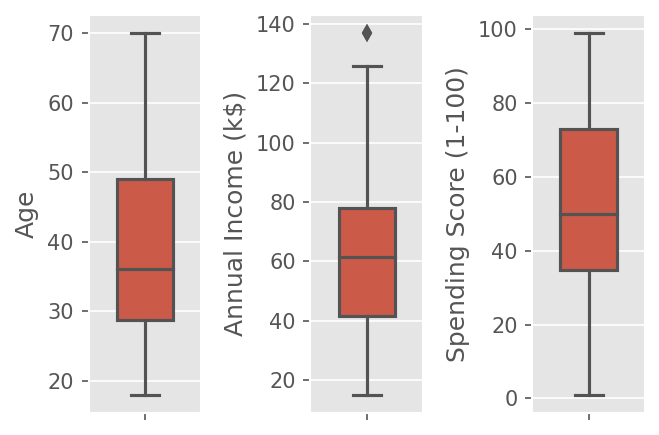

In [7]:
# boxplots for outlier analysis
columns = df.columns[1:] 

fig,axs = plt.subplots(1,len(columns),figsize=(1.5*len(columns),3),dpi=150)
for i,column in enumerate(columns):
    _ = sns.boxplot(df,y=column,ax=axs[i],width=[0.5])

_ = fig.tight_layout()

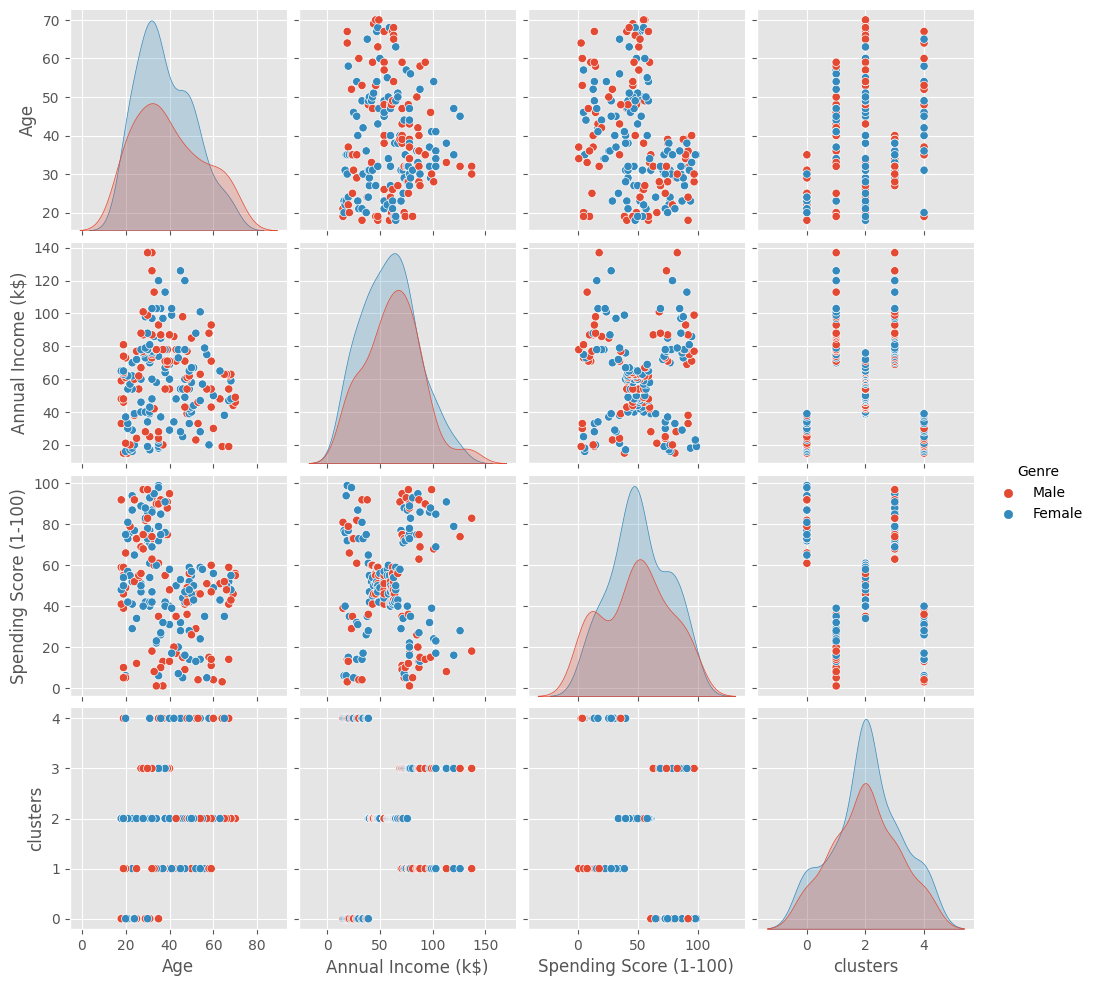

In [17]:
_ = sns.pairplot(df,vars=df.columns[1:],hue='Genre')

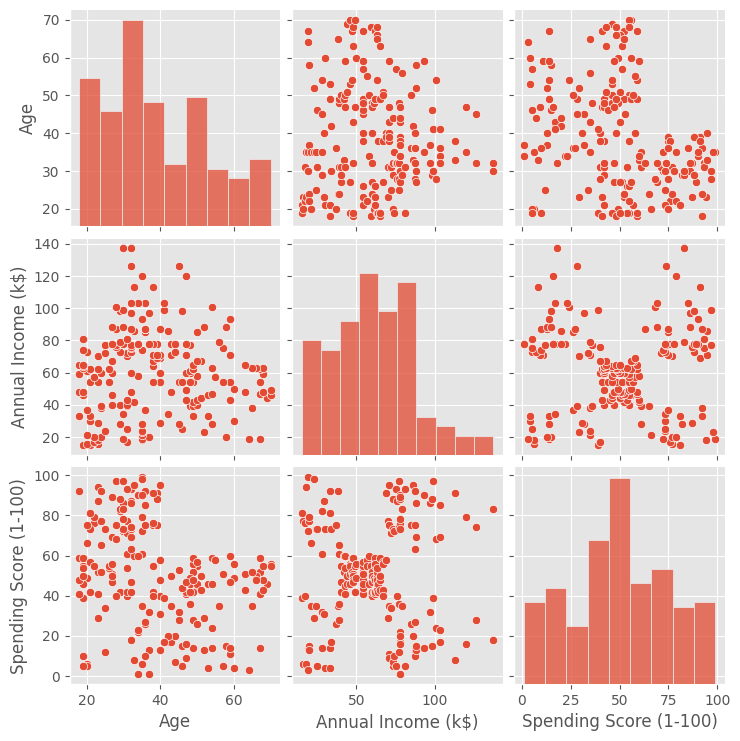

In [ ]:
_ = sns.pairplot(df,vars=df.columns[1:])

In [9]:
sc = StandardScaler()
X = sc.fit_transform(df.iloc[:,2:4])

In [10]:
inertia_list = []
for k in range(2,16):
    km = KMeans(n_clusters=k,random_state=1,init='k-means++').fit(X)
    inertia_list.append(km.inertia_)

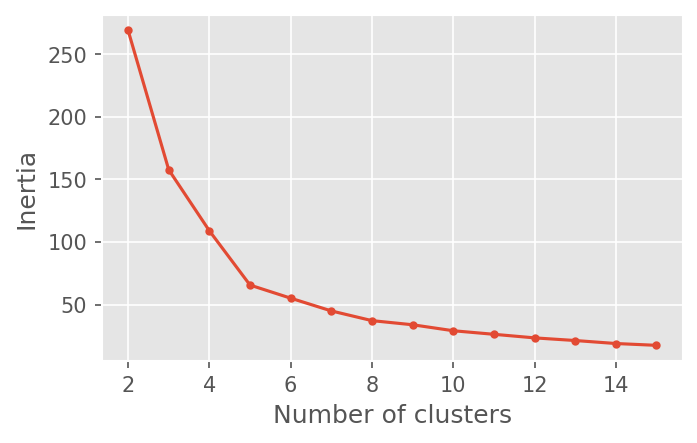

In [11]:
fig,ax = plt.subplots(1,1,figsize=(5,3),dpi=150)
_ = ax.plot(np.arange(2,16),inertia_list,'.-')
_ = ax.set_xlabel('Number of clusters')
_ = ax.set_ylabel('Inertia')

In [12]:
# fit kmeans model with 5 clusters
km = KMeans(n_clusters=5,random_state=1,init='k-means++').fit(X)

# obtain predictions
cluster_labels = km.predict(X)

# Silhouette score
score = silhouette_score(X,cluster_labels)
print('Silhouette score : %5.3f'%score)

Silhouette score : 0.555


In [13]:
#cluster_centers = km.cluster_centers_
cluster_centers_orig_scale = pd.DataFrame(
    sc.inverse_transform(km.cluster_centers_),
    columns=df.columns[2:4]
)
cluster_centers_orig_scale

,Annual Income (k$),Spending Score (1-100)
0,25.727273,79.363636
1,88.200000,17.114286
2,55.296296,49.518519
3,86.538462,82.128205
4,26.304348,20.913043


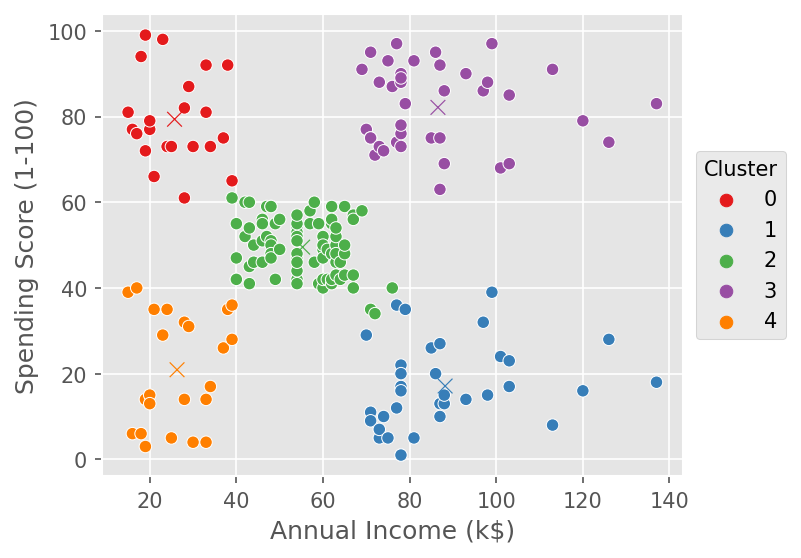

In [14]:
df['clusters'] = cluster_labels

fig,ax = plt.subplots(1,1,figsize=(5,4),dpi=150)
# plot data
_ = sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='clusters',
    palette=sns.color_palette("Set1",5),
    ax=ax
)
_ = sns.scatterplot(
    data=cluster_centers_orig_scale,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue=np.arange(5),
    palette=sns.color_palette("Set1",5),
    ax=ax,
    #style='Centers',
    marker='x',
    s=50,
    legend=False
)
_ = ax.legend(
    bbox_to_anchor=(1.1,0.5), loc='center', borderaxespad=0,title='Cluster')
